In [37]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import torch
import os
import seaborn as sns
pd.set_option('display.max_colwidth', -1)
import re
import json
from sklearn.model_selection import train_test_split
sns.set_style("whitegrid")
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Metadata for runs

In [74]:
runs1 = pickle.load(open('results/grid/basic/metadata.pt', 'rb'))
runs2 = pickle.load(open('results/grid/basic/metadata2.pickle', 'rb'))
runs3 = pickle.load(open('results/grid/basic/metadata3.pickle', 'rb'))

In [76]:
runs1.update(runs2)
runs1.update(runs3)

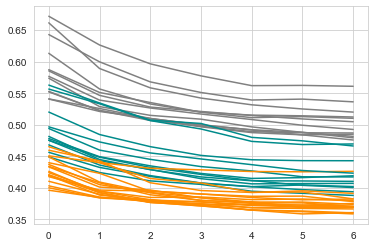

In [86]:
runs = runs1
colors = {0.001: 'darkorange', 1e-05: 'grey', 0.0001: 'darkcyan'}
for i in list(runs.keys()):
    params = runs[i]['parameters']
    info = str(params['batch_size'])+" maxl "+ str(params['maxlen']) + ' lr ' + str(params['lr']) +'step'+str(params['step'])
    plt.plot(np.array(runs[i]['val_error_all']), color=colors[params['lr']], label = info)

# Load results

In [3]:
eval_res = pickle.load(open('results/evaluation/evaluation_for_puns_test_BERT_model_basic_weighted_CLS_v2.pt', 'rb'))

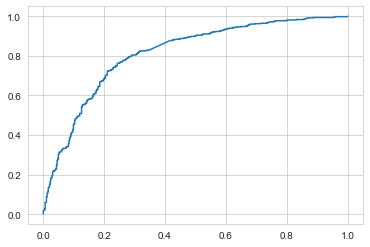

In [5]:
plt.plot(eval_res['metrics']['fpr'], eval_res['metrics']['tpr'])

In [30]:
accuracy_score(y_true = eval_res['truth'], y_pred = eval_res['preds']>0.5)

0.7567287784679089

In [31]:
precision_score(y_true = eval_res['truth'], y_pred = eval_res['preds']>0.5)

0.75

In [32]:
recall_score(y_true = eval_res['truth'], y_pred = eval_res['preds']>0.5)

0.7671517671517671